<h1 align='center'> K-means Clustering on Credit Card Data

      
#### In this notebook, we perform customer segmentation using K-means clustering on their credit card usage data. Ultimately, we want to analyze different customer types  in order to launch a targeted marketing ad campaign that is tailored to specific segments.
     

   
## Part 0. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("~/Desktop/projects/Kmeans_Clustering/creditcarddata.csv")
df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [3]:
df.shape

(8950, 18)

#### Data Description

This dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. This file is at customer level with 17 behavioral variables. 

- CUST_ID: Identification of Credit Card holder 
- BALANCE: Balance amount left in customer's account to make purchases
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account
- ONEOFFPURCHASES: Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES: Amount of purchase done in installment
- CASH_ADVANCE: Cash in advance given by the user
- PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
- CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
- PURCHASES_TRX: Number of purchase transactions made
- CREDIT_LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by user
- MINIMUM_PAYMENTS: Minimum amount of payments made by user  
- PRC_FULL_PAYMENT: Percent of full payment paid by user
- TENURE: Tenure of credit card service for user

We assume currency to be USD in this analysis.

## Part 1. Explore Data

In [4]:
# Change all the column names to lowercase
df.columns = df.columns.str.lower()

In [5]:
# Print summary statistics of each variable
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### Handle missing values

In [6]:
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [7]:
# For now, we assume that some rows are missing minimum_pyments and credit_limit at random; we replace them with the mean value
df.loc[(df['minimum_payments'].isnull()==True), 'minimum_payments'] = df['minimum_payments'].mean()
df.loc[(df['credit_limit'].isnull()==True), 'credit_limit'] = df['credit_limit'].mean() 
# alternatively: df['credit_limit'].fillna(df['credit_limit'].mean(), inplace=True)
df.isnull().sum().sum()

0

In [8]:
# Check if there are duplicated entries 
df.duplicated().sum()

0

In [9]:
# Drop customer ID from data
df.drop('cust_id', axis=1, inplace=True)
df.head(3)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


#### Check distribution of variables

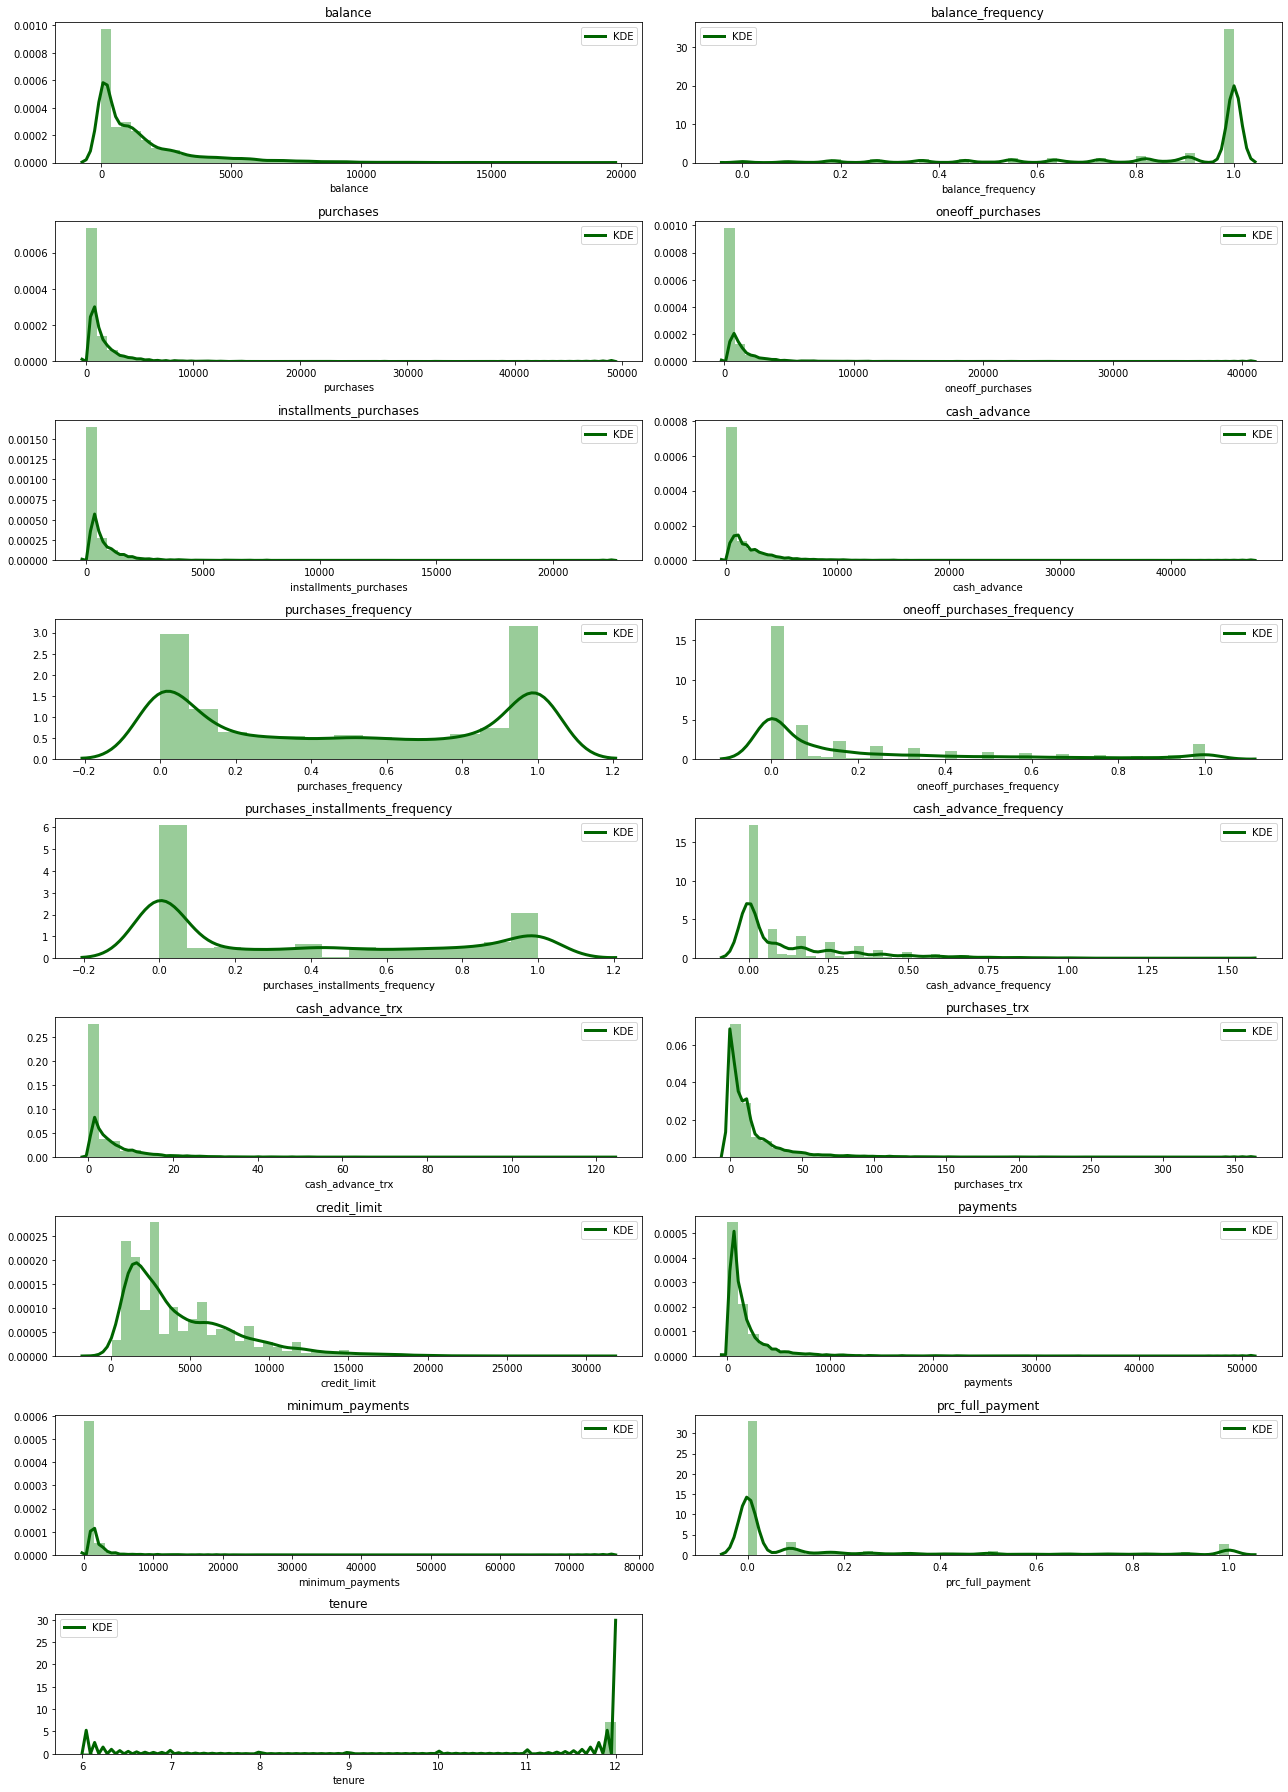

In [10]:
# Create DISTPLOT, which combines histogram and probability density plot

plt.figure(figsize=(18,25))
for i in range(len(df.columns)):
    plt.subplot(9, 2, i+1)
    sns.distplot(df[df.columns[i]], kde_kws={"color": "darkgreen", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
    plt.title(df.columns[i])

plt.tight_layout()

Summary of features
- Balance: Most customers have balance below 5,000 USD (mean balance is around 1,500). 
- Balance fequency: It is updated very frequently for most customers.
- Purchases & Oneoff Purchases & Installment purchases: These variables have mean values of 1000, 600 and 400 respectively. There seem to be some high outliers.
- Purchase Frequency: It seems bimodal with some customers making purchases very frequently and the others not.
- Oneoff purchases frequency & Purchase installments frequency & Cash advance frequency: Most customers don't do them often.
- Purchase tx: Mean number of transactions is 14. However, we also see some customers with more than 300 transactions, which is quite high given this data reflects the past six months.
- Credit limit: Most customers have credit limits below 10,000 with mean of 5,000. 
- Prc full payment: Most customers do not make the payment in full, although there are a small portion of customers who seem to be always making full payments.
- Tenure: Customers are about 11 years tenure on average. 

#### Check correlation between varaibles

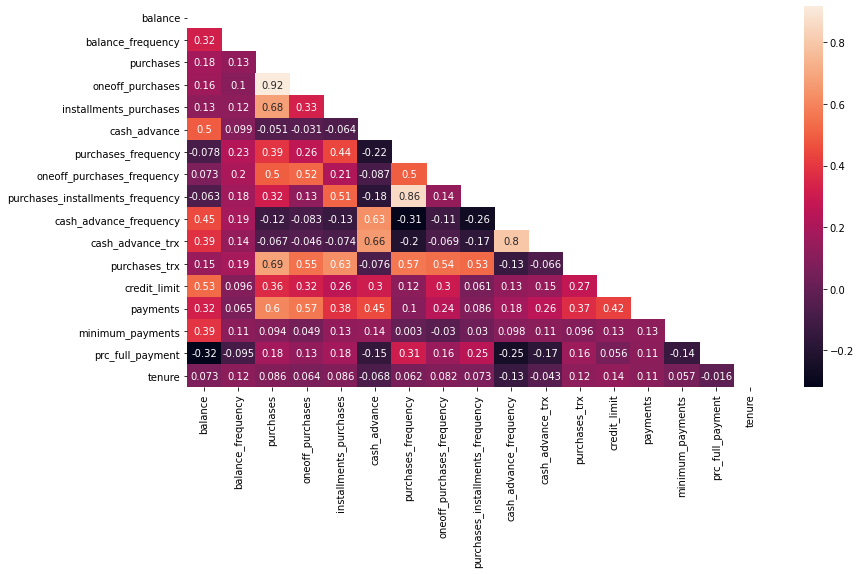

In [11]:
# Create correlation matrix
corr = df.corr()
matrix = np.triu(corr)
f, ax = plt.subplots(figsize=(13,7))
sns.heatmap(corr, annot=True, mask=matrix)
plt.show()

Not surprisingly, purhcases and oneoff purchases are highly correlated. Generally frequency, amount, and number of transactions of certain transaction types are correlated (i.e., cash advance and cash advance frequency).

## Part 2. Implement K-Means Clustering

K-means clustering is an unsupervised learning algorithm. When working with data without labels, K-means clustering algorithm groups some data points with similar attribute values together and creates clusters with minimum Euclidean distance between points.    
      
           
These are the basic steps to apply algorithm:
1. Choose number of clusters "K" (in our example, we use 'elbow method').
2. Select random K points to be centorids for each cluster.
3. Assign each data points to the nearest centroid, creating K number of clusters.
4. Calculate a new centoid for each cluster.
5. Reassign each data point to the new closest centroid.
6. Iterate through step 4-5 until the centriod location does not change between iterations (or some maximimum number of iterations is reached).

Note that this algorithm may converge on a local optimum. Different starting centroid could lead to different clustering outcome.

### 2.1. Find the optimal number of clusters using elbow method

Elbow method calculates sum of squared errors (SSE), which is the sum of squared distance from each observation and the cluster centroid, for different number of K. Then, we plot SSE values against the K values and find the elbow of the plot. The elbow is the point where adding another cluster doesn't improve the model fit much.    

Since K-means clustering algorithm measures distance between points, we first have to scale the variables.

In [12]:
# Scale dataset using stnadardscaler - transforms data to be centered at zero with standard deviation of 1.
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(8950, 17)

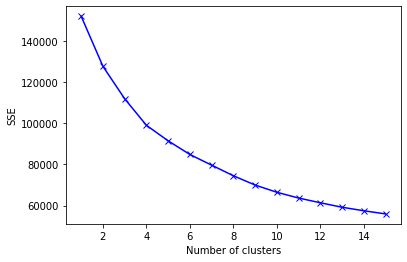

In [13]:
# Get SSE for different number of clusters
sse ={}

for i in range(1,16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_scaled)
    sse[i] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster centeR

plt.figure(figsize=(6,4))
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.ylabel("SSE")
plt.xlabel("Number of clusters")
plt.show()

K=3 could be seen as an elbow. But SSE continues to drop a lot even after 3 clusters until K=7 or 8. Here, we will choose 7 to be our K.

### 2.2. Apply K-means method 

In [14]:
# Kmeans with 7 clusters
kmeans = KMeans(7)
kmeans.fit(df_scaled)
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(7, 17)

In [15]:
# Centoid values for each of 7 clusters
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,1.595999,0.375434,-0.224643,-0.157614,-0.241671,1.947552,-0.482076,-0.205397,-0.432563,1.901628,1.846363,-0.277713,0.967639,0.743508,0.483795,-0.392874,-0.092527
1,-0.009849,0.372382,-0.359667,-0.242282,-0.405228,-0.076830,-0.869656,-0.397908,-0.771214,0.144094,-0.020236,-0.488550,-0.340005,-0.265583,-0.026642,-0.454865,-0.006812
2,-0.393688,0.307566,-0.064501,-0.256298,0.318307,-0.360464,0.976480,-0.408602,1.169552,-0.458577,-0.355263,0.136268,-0.321963,-0.245633,-0.071169,0.351668,-0.027121
3,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
4,-0.698208,-2.133550,-0.318189,-0.236589,-0.317596,-0.306400,-0.567450,-0.433761,-0.462868,-0.483001,-0.357983,-0.428143,-0.215326,-0.223513,-0.255534,0.250886,-0.163771
5,1.048386,0.463156,2.456003,1.757530,2.578270,-0.157984,1.167396,1.515979,1.280758,-0.285350,-0.154415,3.069917,1.279859,1.423843,0.737754,0.234849,0.338098
6,-0.125877,0.394457,0.527065,0.650444,0.051112,-0.329053,0.964151,1.847545,0.187044,-0.409876,-0.333815,0.605237,0.429057,0.133910,-0.157811,0.413838,0.208487


In [16]:
# In order to understand what these numbers mean, let's perform inverse transformation on the scaled variables.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,4886.412976,0.966208,523.251112,330.830231,192.527566,5062.979491,0.296870,0.141184,0.192526,0.515679,15.848898,7.806925,8015.114948,3885.528074,1991.671242,0.038806,11.393494
1,1543.974961,0.965484,234.771186,190.298254,44.625318,817.755502,0.141315,0.083754,0.057937,0.163979,3.110731,2.566302,3257.370699,964.308124,802.118684,0.020674,11.508202
2,745.047030,0.950130,865.398500,167.035185,698.908939,222.960670,0.882259,0.080564,0.829247,0.043378,0.824417,18.096936,3323.017094,1022.059864,698.351310,0.256571,11.481024
3,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
4,111.214500,0.371852,323.389299,199.748074,123.869884,336.335366,0.262605,0.073058,0.180482,0.038491,0.805855,4.067797,3711.004541,1086.096788,268.694742,0.227094,11.298151
5,3746.601659,0.986988,6250.493846,3509.576978,2742.565220,647.570772,0.958883,0.654704,0.873443,0.078043,2.195055,91.016484,9151.098901,5855.030494,2583.510159,0.222404,11.969780
6,1302.472608,0.970714,2129.287262,1672.041010,457.287154,288.832445,0.877311,0.753616,0.438773,0.053124,0.970785,29.753756,6055.533465,2120.800307,496.434640,0.274755,11.796327


In [17]:
# Assign 'cluster labels' to customers 
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans.shape

(8950,)

In [28]:
# Merge the clusters labels to our original dataframe
df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head(3)

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,6


In [32]:
# See cluster breakdown
df_cluster['cluster'].value_counts()

1    2924
2    2187
4    1298
6    1200
0     953
5     364
3      24
Name: cluster, dtype: int64

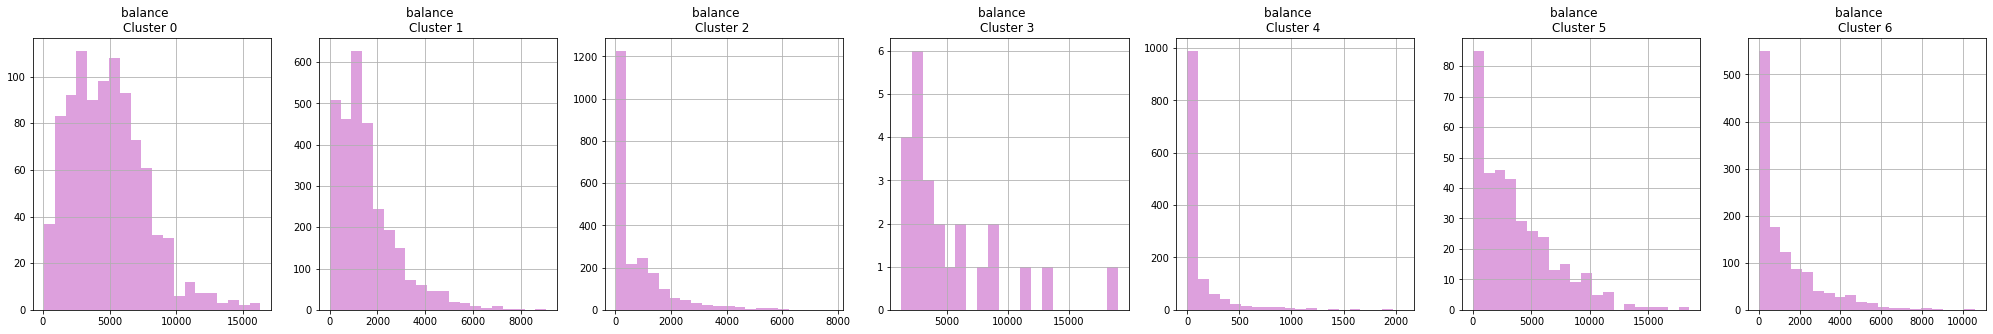

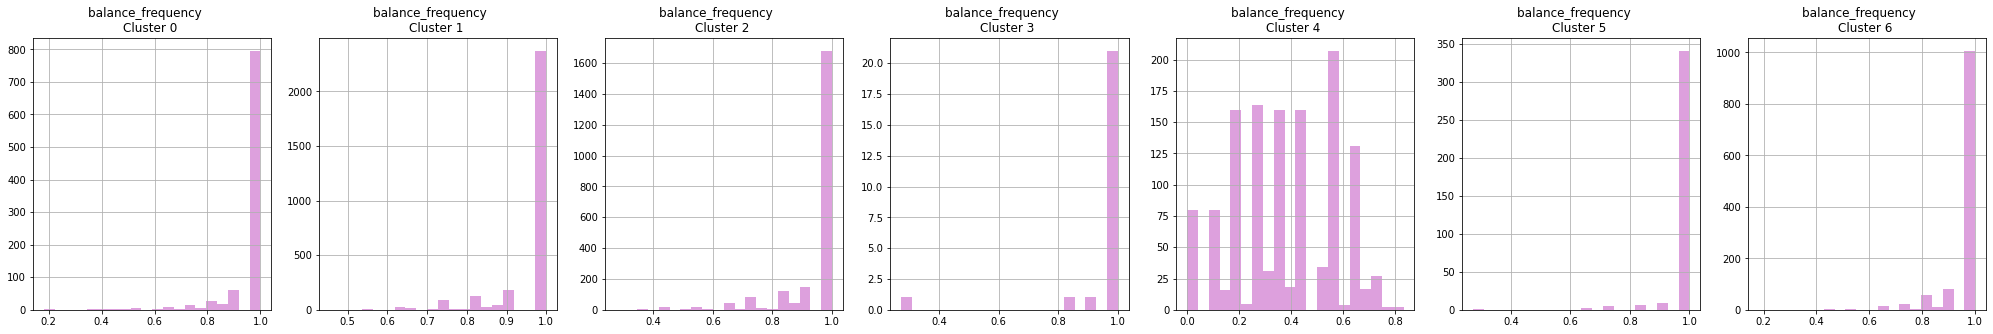

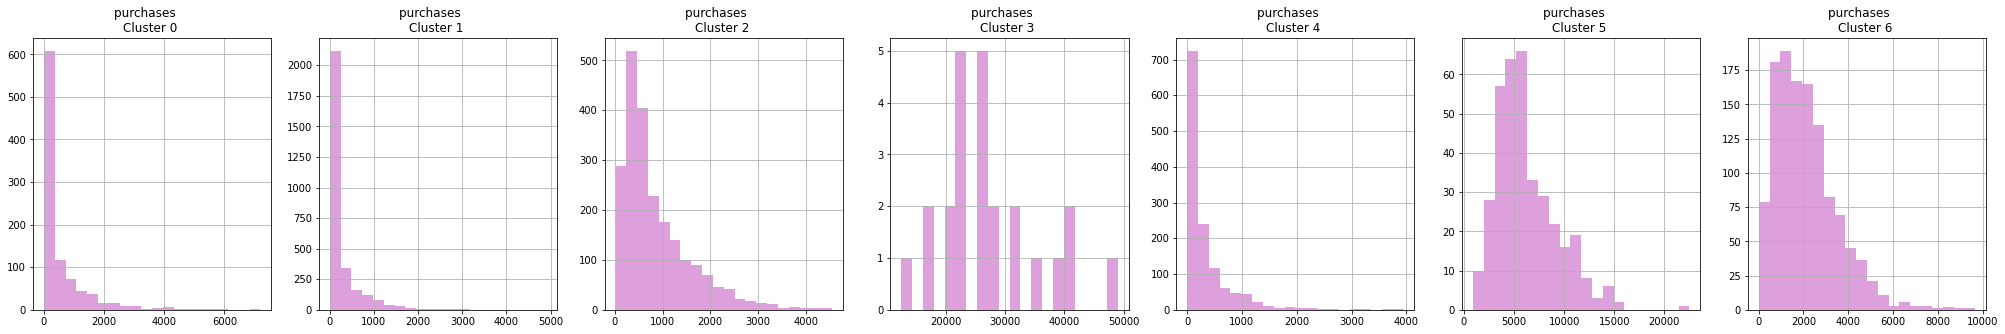

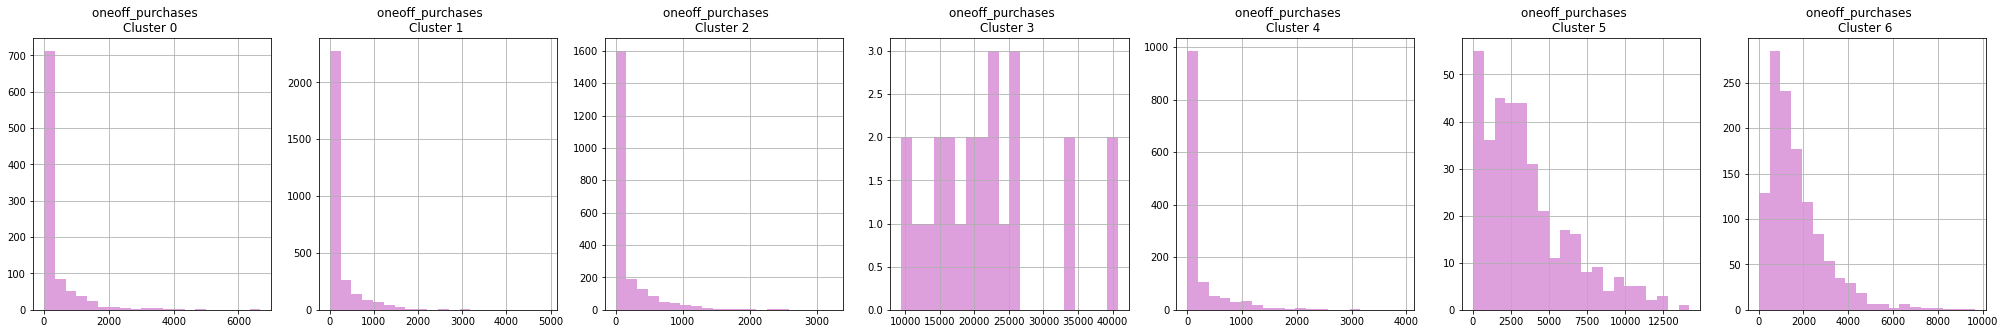

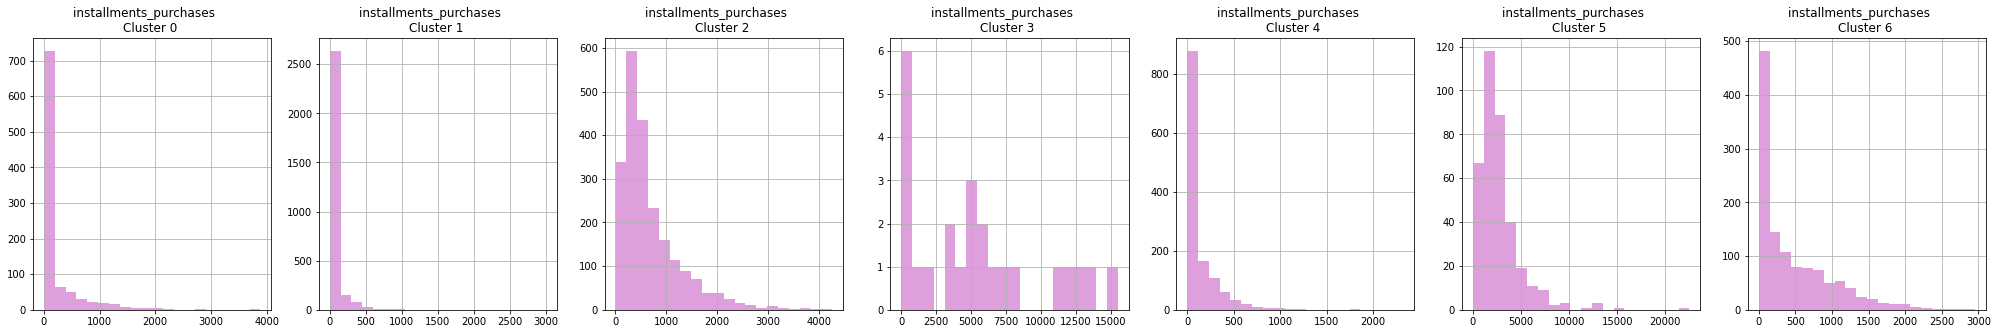

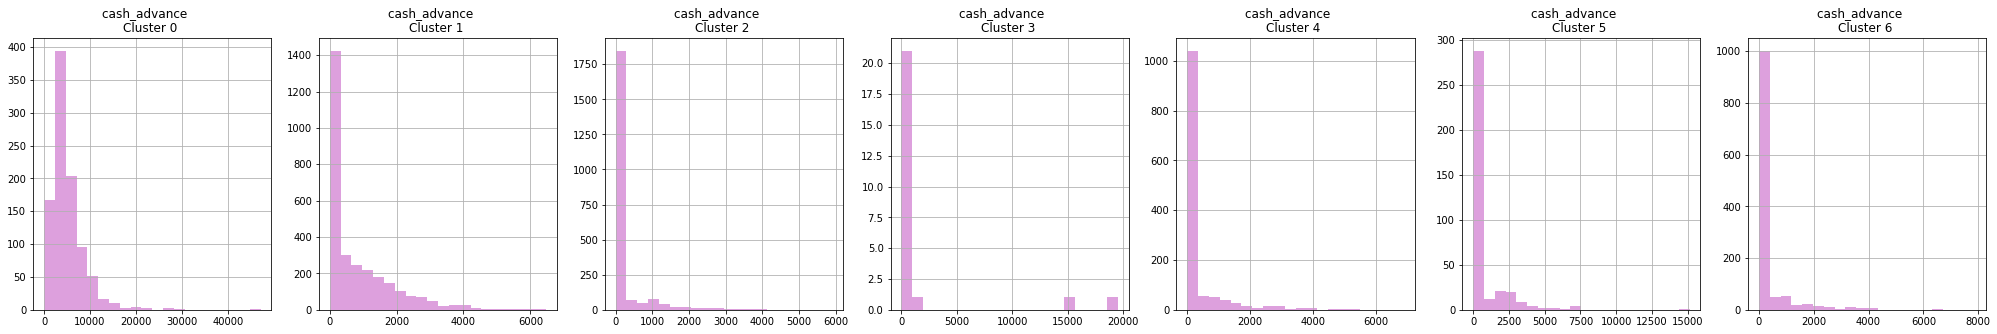

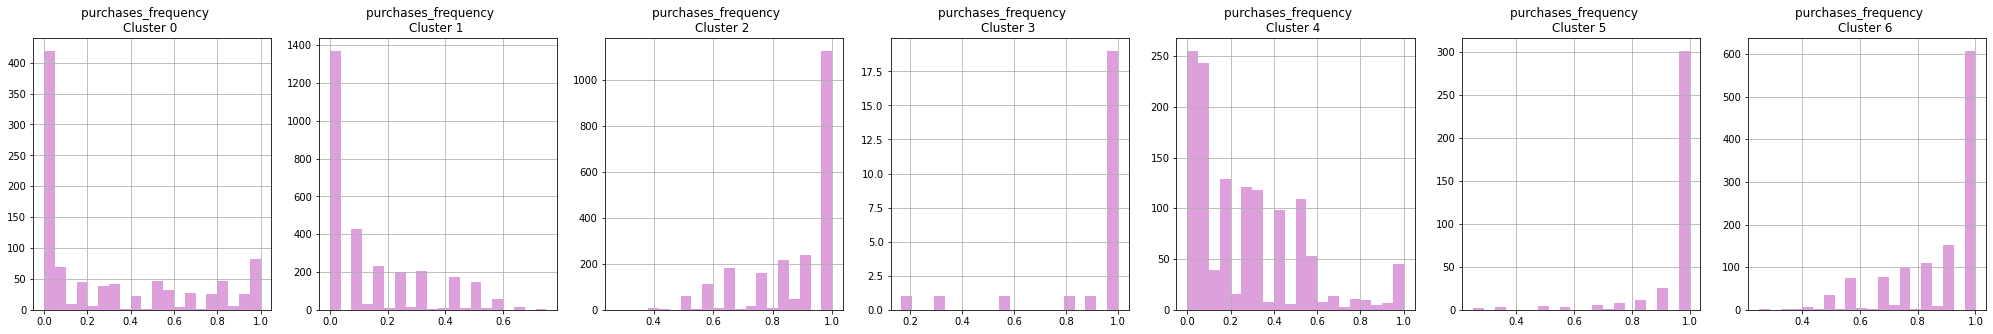

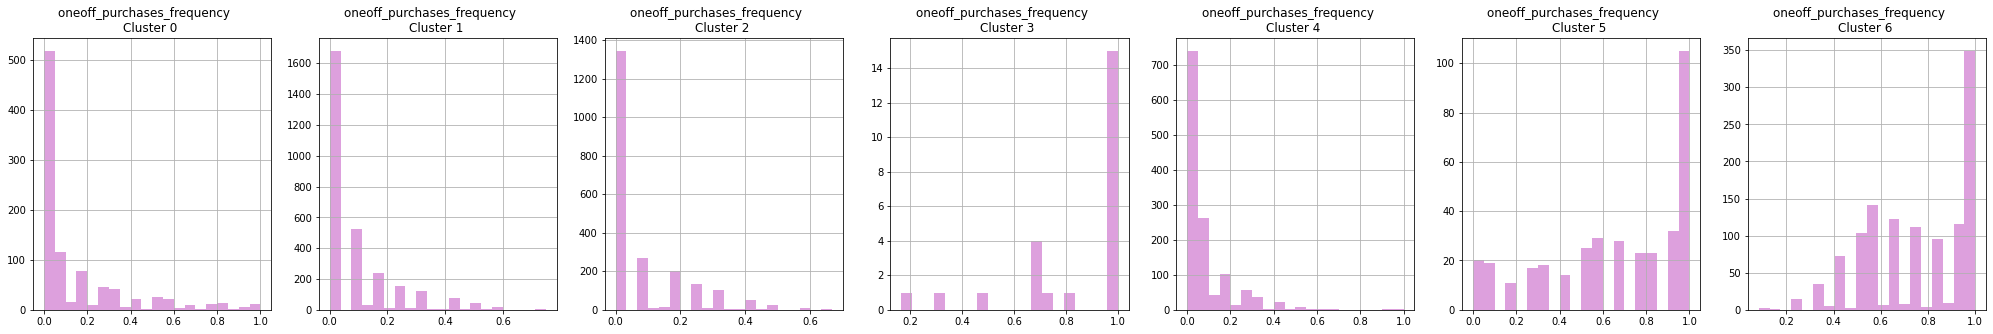

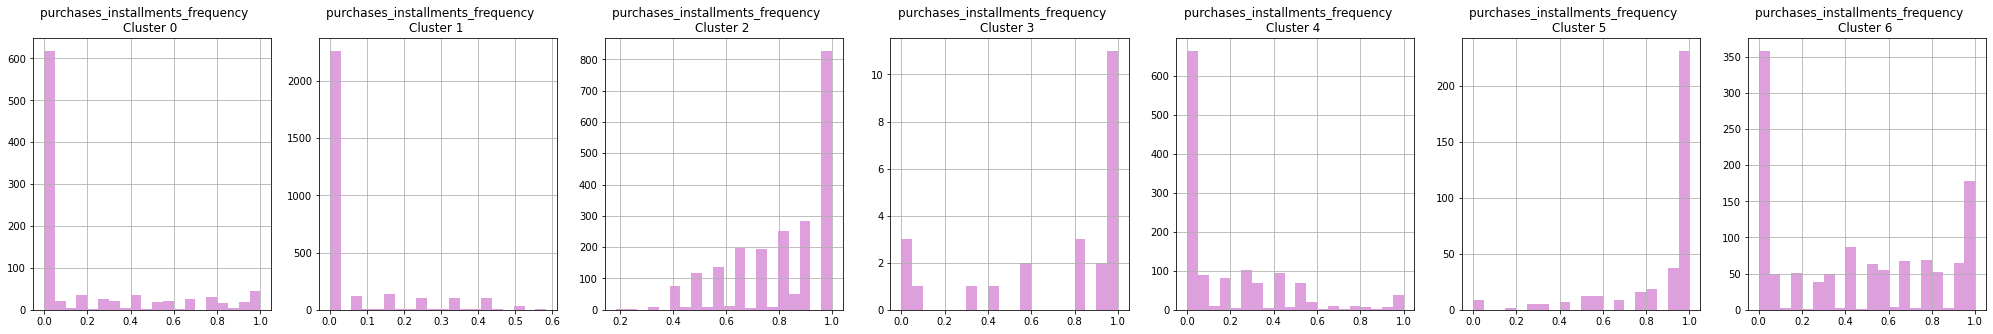

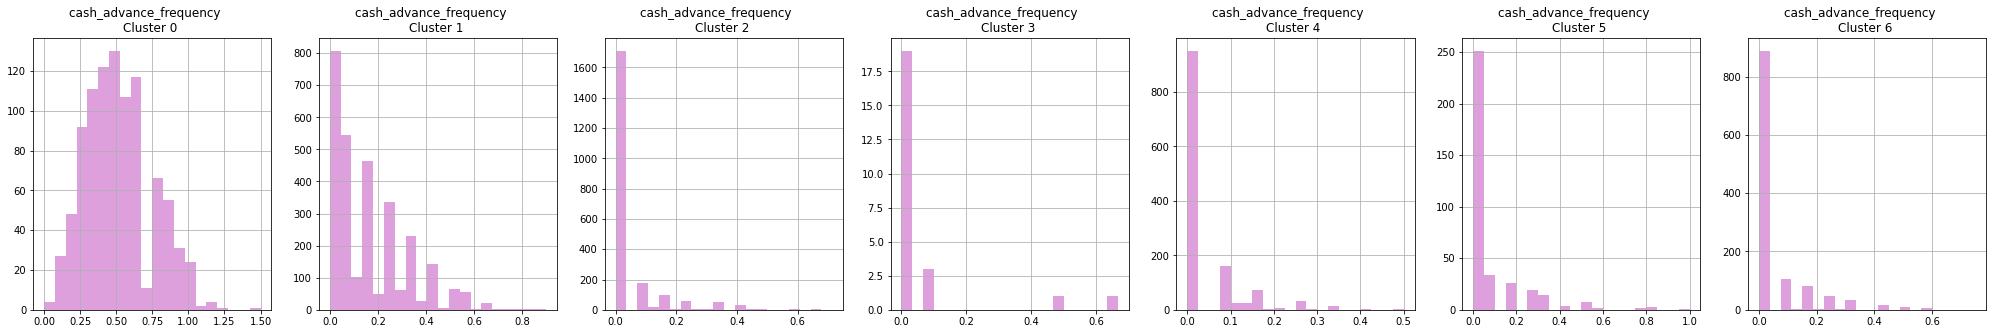

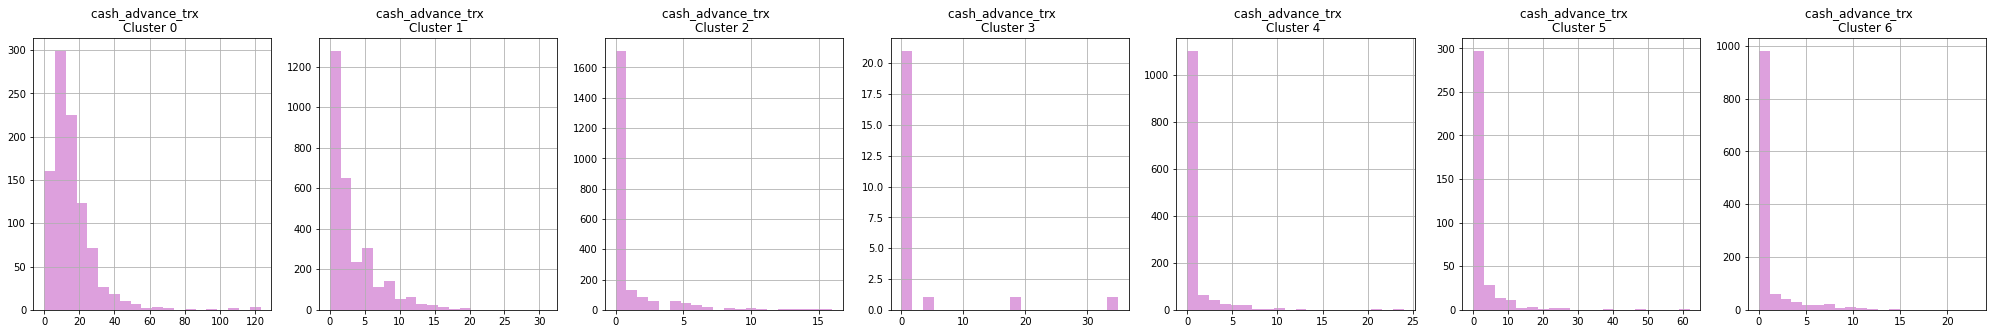

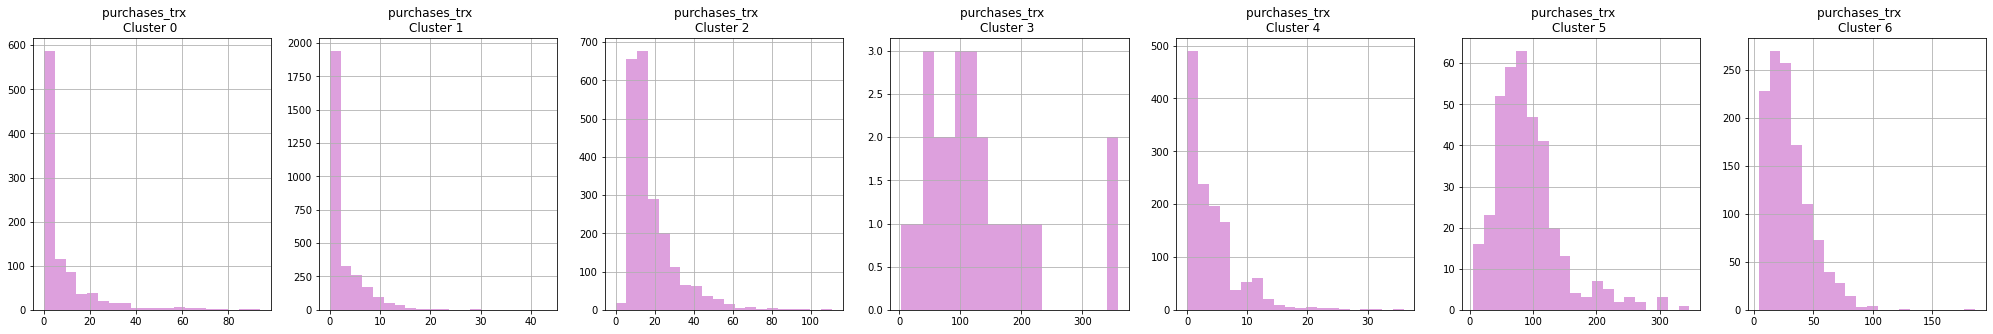

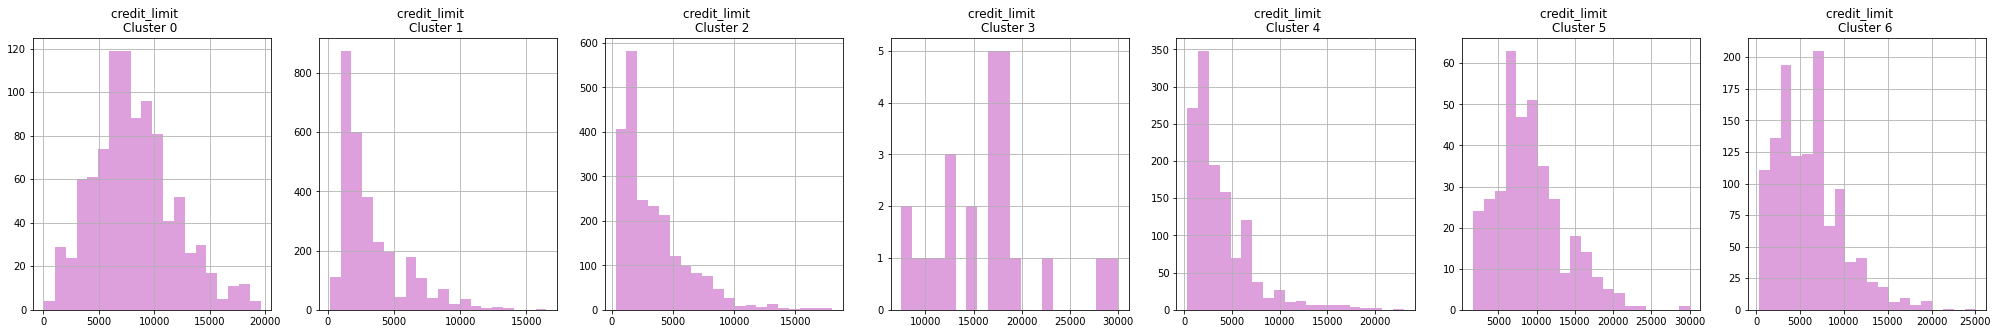

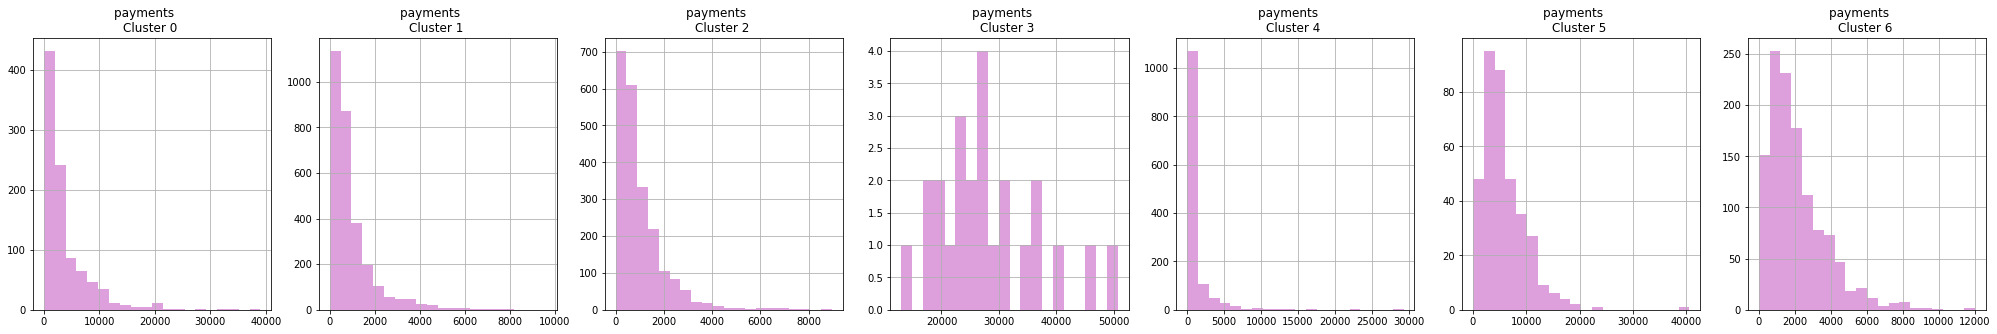

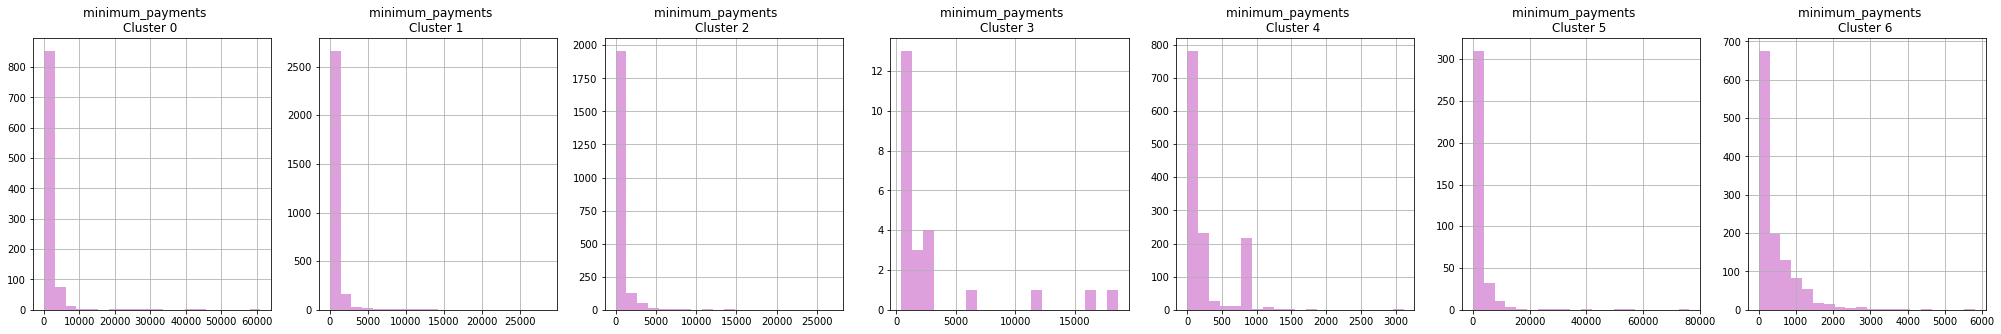

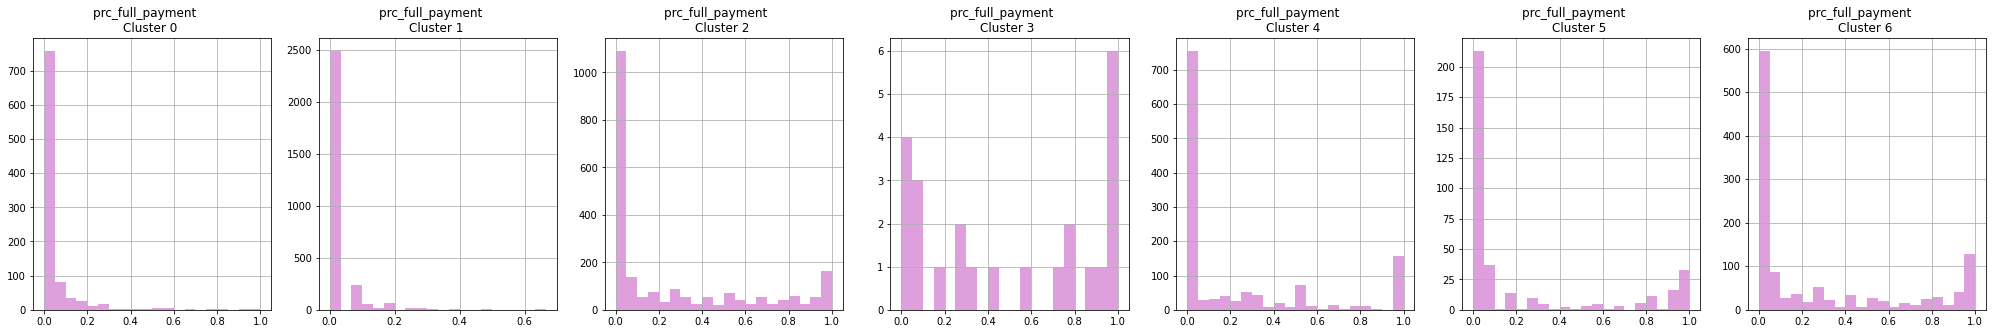

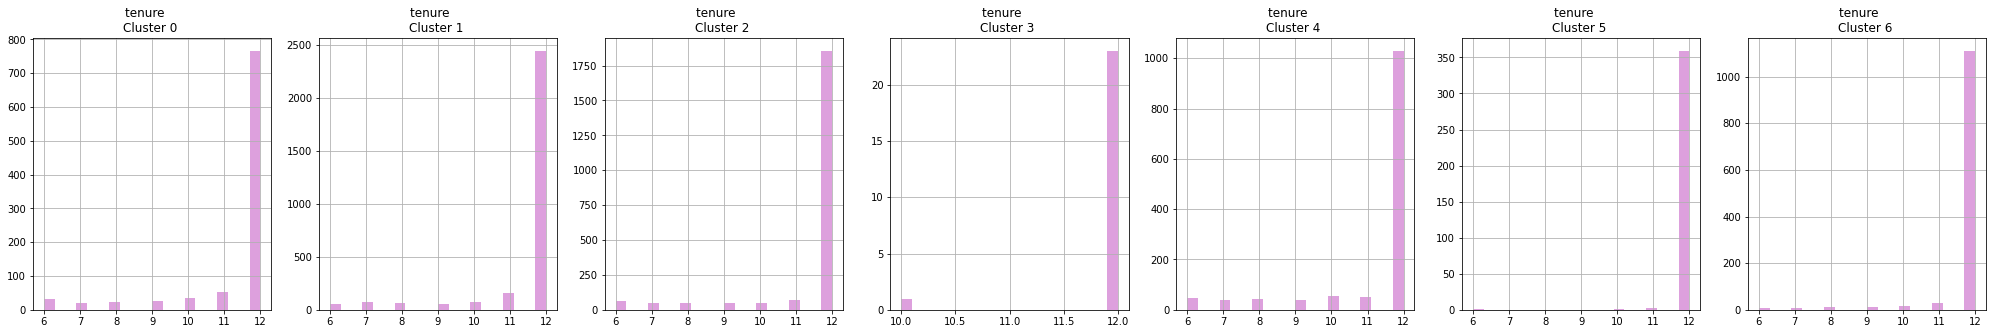

In [33]:
# Plot the histograms for each cluster
for i in df.columns:
    plt.figure(figsize = (35, 5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20, color='plum')
        plt.title('{}    \nCluster {} '.format(i,j))
plt.show()

### 2.3. Identify Customer Segments

> 1. __VIP__: This cluster of customers has the highest credit limit of 16k and highest purchases. They also show the highest percent of full payments, which is nearly 50%. Increasing credit limit might lead to an increase in their spending habits. But this is only a small group of customers.

> 2. __Revolvers__: This group of customers uses creidt card as a loand. They have highest amount and frequency for cash advance. They also have high balance and payment. The percent of full payment is low. This is the most lucrative sector.

> 3. __Transactors__: These customers are very careful with their money and pay the least amount of interest charges. They have the low balance and low cash advance histories with 23% of full payments. Two clusters seem to fit in this group (but one group has a little higher balance and spending habits).

> 4. __Small Spender__: This is the group with the lowest credit limit and lowest purchases. But they have the second highest frequency and amount of cash advances with a very low percent of full payments. They might be 'at-risk' customers with low credit scores. 


## Part 3. Apply Principal Component Analysis (PCA) and Visualize Segments

PCA is an unsupervised machine learning algorithm that performs dimentsionality reductions while preserving as much original information as possible. PCA finds a new set of features called components, which maximizes the variance of projected data. The components are uncorrelated with each other.   

In [20]:
# Obtain the principal components - here, we will find two components.
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68222065, -1.0764463 ],
       [-1.13829451,  2.50647879],
       [ 0.96968775, -0.3835563 ],
       ...,
       [-0.92620407, -1.81078358],
       [-2.33655134, -0.65797264],
       [-0.55641929, -0.40049693]])

In [21]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head(3)

,pca1,pca2
0,-1.682221,-1.076446
1,-1.138295,2.506479
2,0.969688,-0.383556


In [22]:
pca_df.shape

(8950, 2)

In [23]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head(3)

,pca1,pca2,cluster
0,-1.682221,-1.076446,1
1,-1.138295,2.506479,0
2,0.969688,-0.383556,6


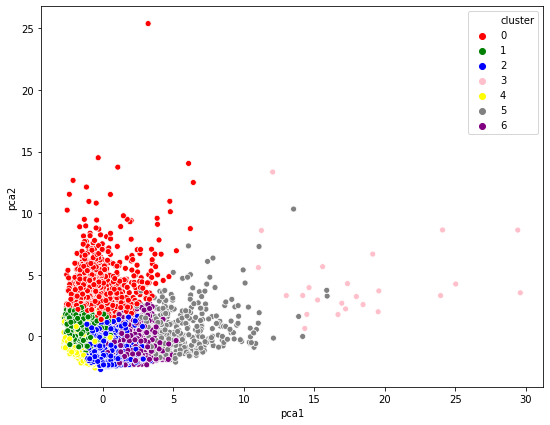

In [24]:
plt.figure(figsize=(9,7))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", 
                     data = pca_df, 
                     palette =['red','green','blue','pink','yellow','gray','purple'])
plt.show()

Using first two principal components, we can see that our customer segments form different clusters.